In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from collections import Counter
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [53]:
df1=pd.read_excel('E:/Documents/Alagasan/PG/Projects/Main Project/DB of Ansio.xlsx')
df2=pd.read_excel('E:/Documents/Alagasan/PG/Projects/Main Project/DB of ansio 2.xlsx')
frame=[df1,df2]
df=pd.concat(frame)
df

,Order Id,Sequence No,Delivery Type,Created Date,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Id,...,Discount,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected)
0,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,0.0,0.0,0.0,0.0,0.0,2.0,355.36,355.36,42.64,398.0
1,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,0.0,0.0,0.0,0.0,0.0,2.0,234.00,234.00,0.00,234.0
2,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,44.7,0.0,0.0,0.0,0.0,1.0,39.91,0.00,0.00,0.0
3,2003513,\t(No Sequence No Info Available),other,2020-01-01,07:03:00,\tcompleted,\tCompleted,Cash,Z- Pallavaram,638,...,0.0,0.0,0.0,0.0,0.0,1.0,12.46,12.46,2.24,14.7
4,2003517,\t(No Sequence No Info Available),other,2020-01-01,07:09:00,\tcompleted,\tCompleted,Cash,Selaiyur Store,433,...,0.0,0.0,0.0,0.0,0.0,1.0,98.10,98.10,4.90,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240061,2791348,\t4810,other,2020-06-30,20:10:00,\tPartial Refund,\tCompleted,Online,Maduravayal Hub,,...,0.0,0.0,0.0,0.0,0.0,1.0,34.00,34.00,0.00,34.0
240062,2791348,\t4810,other,2020-06-30,20:10:00,\tPartial Refund,\tCompleted,Online,Maduravayal Hub,,...,0.0,0.0,0.0,0.0,0.0,1.0,59.00,59.00,0.00,59.0
240063,2791348,\t4810,other,2020-06-30,20:10:00,\tPartial Refund,\tCompleted,Online,Maduravayal Hub,,...,0.0,0.0,0.0,0.0,0.0,1.0,76.00,76.00,0.00,76.0
240064,2791348,\t4810,other,2020-06-30,20:10:00,\tPartial Refund,\tCompleted,Online,Maduravayal Hub,,...,0.0,0.0,0.0,0.0,0.0,1.0,9.00,9.00,0.00,9.0


In [3]:
df.shape

(1271386, 52)

In [4]:
df.describe()

,Order Id,Phone Number,SKU,MRP,Unit Selling Price,Quantity,CESS 12%,CGST 14%,CGST 2.5%,CGST 6%,...,Discount,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected)
count,1.271386e+06,1.611800e+04,1.271379e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,...,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06,1.271386e+06
mean,2.501351e+06,9.240326e+09,1.241980e+05,5.785081e+01,6.136972e+01,9.826948e-01,1.012970e-02,1.201593e-02,9.160274e-02,1.015826e-01,...,2.851678e-01,2.545132e-02,1.434653e+00,3.236594e-03,1.437889e+00,9.572435e-01,4.808494e+01,4.639787e+01,8.340412e-01,4.902170e+01
std,2.136824e+05,8.324872e+08,9.569693e+04,7.470740e+01,7.433669e+01,1.527503e+00,2.344654e-01,2.826648e-01,7.066129e-01,1.190772e+00,...,6.498476e+00,5.621913e-01,2.072675e+01,5.024982e-01,2.081506e+01,1.435409e+00,2.032932e+02,2.024468e+02,5.041893e+00,2.033421e+02
min,2.003504e+06,6.245896e+09,1.815000e+04,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,-3.000000e+00,-4.440892e-16,-1.500000e+01,-4.500000e+02,-1.000000e-02,-8.329330e+01
25%,2.345337e+06,8.980674e+09,1.001780e+05,7.000000e+00,2.500000e+01,4.640000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.120000e-01,1.485000e+01,1.380000e+01,0.000000e+00,1.524000e+01
50%,2.581344e+06,9.551536e+09,1.002600e+05,3.900000e+01,4.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.904000e+01,2.800000e+01,0.000000e+00,3.000000e+01
75%,2.661079e+06,9.841625e+09,1.004140e+05,7.700000e+01,7.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.600000e+01,5.485000e+01,0.000000e+00,5.700000e+01
max,3.233248e+06,9.999235e+09,9.619001e+07,3.999000e+03,4.080000e+03,6.400000e+02,4.123000e+01,4.825910e+01,8.820560e+01,5.571400e+02,...,1.749000e+03,5.520000e+02,1.128900e+04,4.574500e+02,1.128900e+04,6.400000e+02,1.536000e+05,1.536000e+05,2.354470e+03,1.536000e+05


In [54]:
df=df.sort_values(by=['Created Date'])

In [55]:
df.isnull().sum()

Order Id                                                                           0
Sequence No                                                                        0
Delivery Type                                                                      0
Created Date                                                                       0
Created Time                                                                       0
Order Status                                                                       0
Order Item Status                                                                  0
Payment Type                                                                       0
Location Name                                                                      0
Employee Id                                                                        0
Employee Name                                                                      0
Customer Name                                                    

In [52]:
pd.date_range(start = '2020-01-01', end = '2020-06-30' ).difference(df.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=182, freq=None)

In [5]:
df.describe(include='object')

,Sequence No,Delivery Type,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Id,Employee Name,Customer Name,Customer Code,TRN/GSTIN,Item Name,Variation Name,Category,HSN,Unit Of Measure,Tax Rate %
count,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,1271386,263399,1271386,1271386
unique,25642,1,1332,3,3,14,11,44,44,1119,50,1,3744,3525,20,346,3,11
top,\t(No Sequence No Info Available),other,11:25:00,\tcompleted,\tCompleted,Cash,Neelankarai Store,,(No Employee Name),\t(No Customer Specified),(No Customer Code),,Tomato -Naattu Thakkalli,Tomato -Naattu Thakkalli,Vegetables,4012000,weight,\t0 %
freq,416109,1271386,2799,1099692,1242634,432614,252183,282382,282382,1255281,1268739,1271386,47726,47727,797599,23447,837019,1119688


In [6]:
df["Created Date"]

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
240061   2020-06-30
240062   2020-06-30
240063   2020-06-30
240064   2020-06-30
240065   2020-06-30
Name: Created Date, Length: 1271386, dtype: datetime64[ns]

In [7]:
imp_df = df[["MRP","Unit Selling Price","Quantity",'Discount',
 'Sales Return/Refunded Qty',
 'Sales Return/Refunded Amount',
 'Sales Return/Refunded Tax',
 'Sales Returns/Total Refunds',
 'Items Sold',
 'Gross Sales',
 'Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount)',
 'Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax)',
 'Net Total(Net Sales + Net Tax Collected)']]

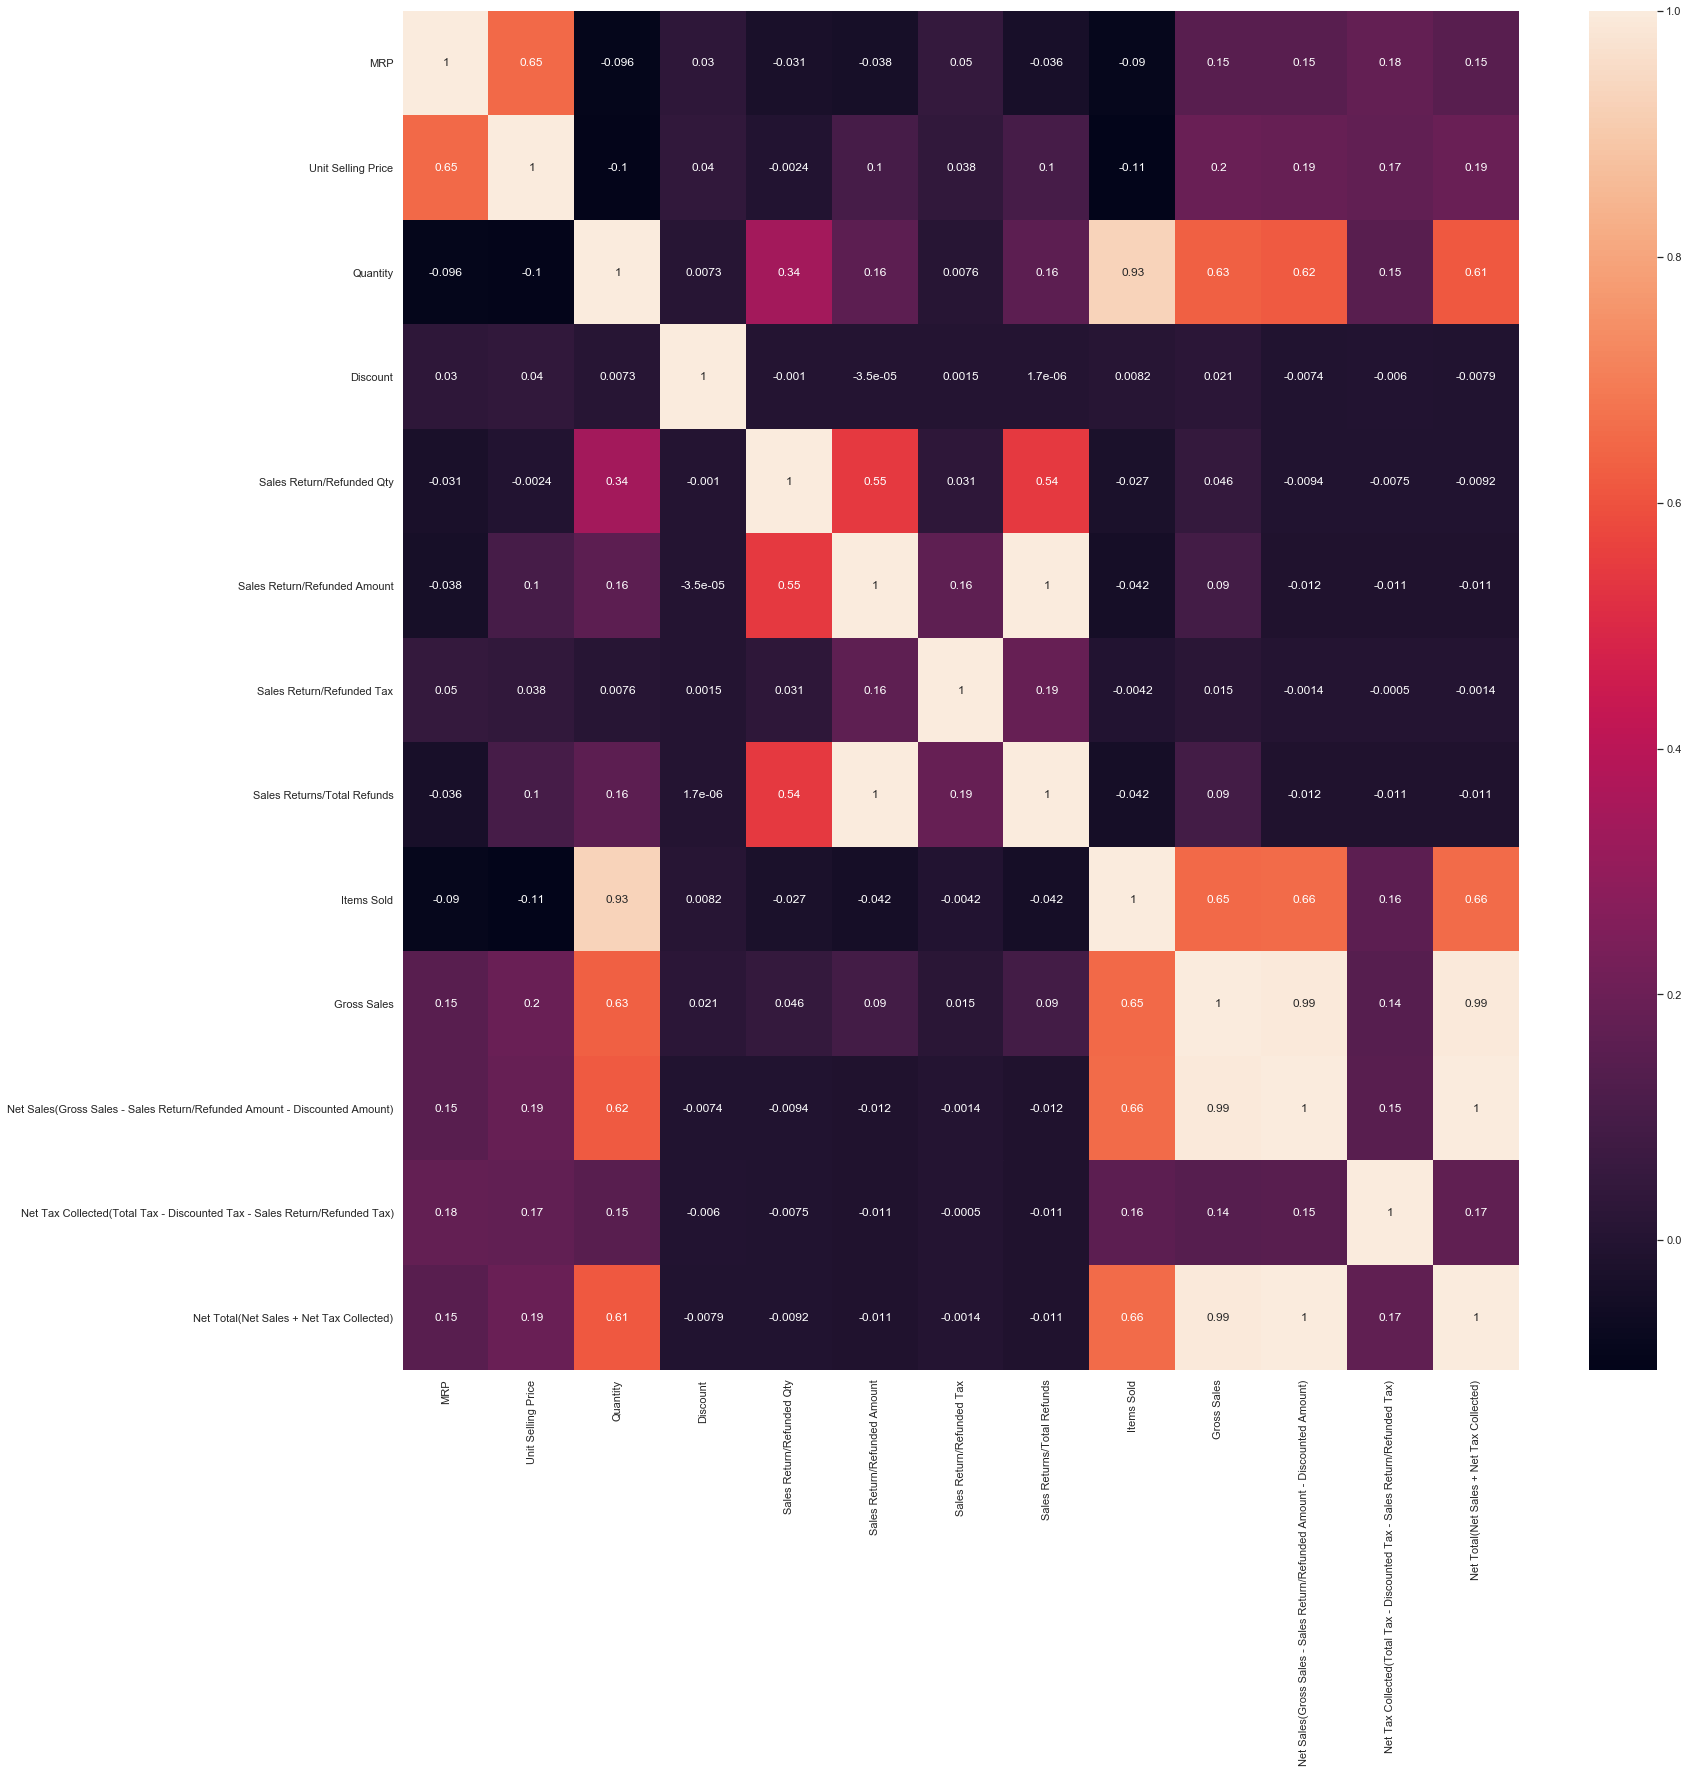

In [8]:
plt.subplots(figsize=(25,25))
sns.heatmap(imp_df.corr(),annot=True)

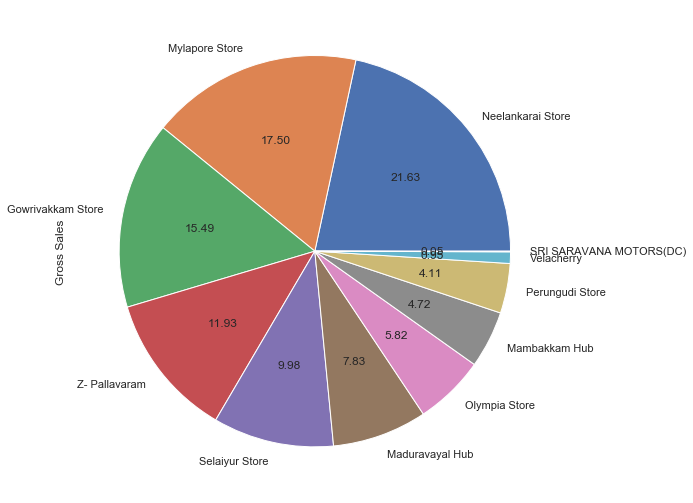

In [9]:
plt.subplots(figsize=(9,9))
df.groupby("Location Name")["Gross Sales"].sum().sort_values(ascending=False).plot(kind="pie",autopct="%.2f")

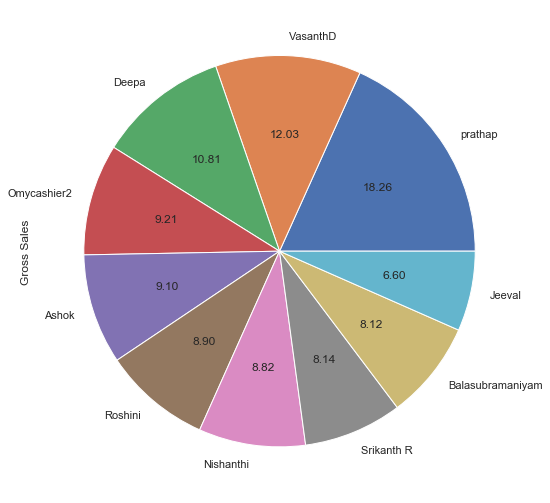

In [56]:
plt.subplots(figsize=(9,9))
df[df['Employee Name']!='(No Employee Name)'].groupby("Employee Name")["Gross Sales"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%.2f")

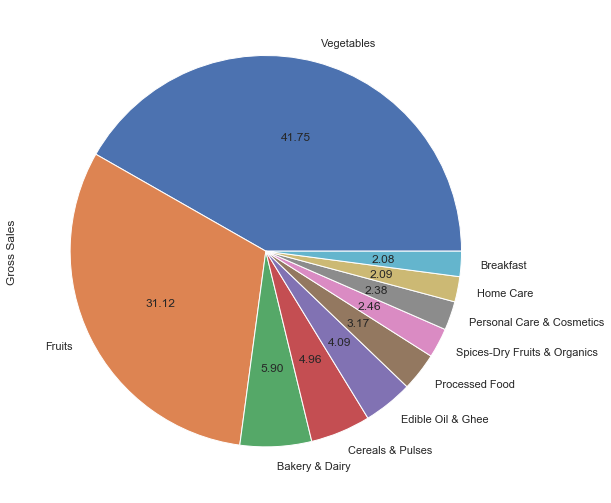

In [11]:
plt.subplots(figsize=(9,9))
df.groupby("Category")["Gross Sales"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%.2f")

In [12]:
quantity_upd=[]
for i,row in df.iterrows():
    row["Quantity"] = float(row["Quantity"])
    if row["Unit Of Measure"] != "weight":
        quantity_upd.append(row["Quantity"])
    else:
        quantity_upd.append(np.ceil(row["Quantity"]))
        #remove this unwanted

In [13]:
df["quantity_upd"] = quantity_upd

In [14]:
df.groupby("Category")['quantity_upd'].sum().sort_values(ascending=False)

Category
Vegetables                      1.009438e+06
Fruits                          3.115560e+05
Bakery & Dairy                  1.006530e+05
Processed Food                  7.914700e+04
Cereals & Pulses                3.444143e+04
Spices-Dry Fruits & Organics    3.189350e+04
Home Care                       2.141000e+04
Personal Care & Cosmetics       2.092400e+04
Atta, Flours, Salt & Sugar      1.822260e+04
Edible Oil & Ghee               1.795800e+04
Snacks & Beverages              1.760400e+04
Breakfast                       1.673200e+04
Bakery, Dairy & Frozen          6.440000e+03
Kitchen Accessories             5.651000e+03
Home Needs & Home Upkeep        2.649000e+03
Beverages                       1.780000e+03
Combo                           1.449000e+03
Healthdrinks                    1.144000e+03
School & Office Stationary      9.100000e+02
General Merchandise             1.460000e+02
Name: quantity_upd, dtype: float64

In [15]:
df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)

Category
Vegetables                      658526.8664
Fruits                          218403.1340
Bakery & Dairy                  100653.0000
Processed Food                   79147.0000
Cereals & Pulses                 31574.3531
Spices-Dry Fruits & Organics     28751.7070
Home Care                        21410.0000
Personal Care & Cosmetics        20924.0000
Edible Oil & Ghee                17958.0000
Snacks & Beverages               17604.0000
Atta, Flours, Salt & Sugar       17533.2560
Breakfast                        16732.0000
Bakery, Dairy & Frozen            6440.0000
Kitchen Accessories               5651.0000
Home Needs & Home Upkeep          2649.0000
Beverages                         1780.0000
Combo                             1447.0900
Healthdrinks                      1144.0000
School & Office Stationary         910.0000
General Merchandise                146.0000
Name: Quantity, dtype: float64

In [16]:
df.groupby(["Location Name","Category"])["Gross Sales"].sum().sort_values(ascending=False)

Location Name            Category                  
Neelankarai Store        Vegetables                    5585955.16
                         Fruits                        5204351.77
Mylapore Store           Vegetables                    4233048.22
Gowrivakkam Store        Vegetables                    3808130.40
Mylapore Store           Fruits                        3036241.29
                                                          ...    
Maduravayal Hub          Bakery, Dairy & Frozen            885.43
Mambakkam Hub            Kitchen Accessories               872.17
Maduravayal Hub          Kitchen Accessories               459.06
SRI SARAVANA MOTORS(DC)  Vegetables                        390.00
Z- Pallavaram            School & Office Stationary        259.98
Name: Gross Sales, Length: 166, dtype: float64

In [17]:
df["Created_month"]=df["Created Date"].dt.month_name()

In [18]:
df[df.Category=="Vegetables"].groupby("Created_month")['Gross Sales'].sum()

Created_month
April       4707642.43
February    2740111.24
January     2946141.36
June        4600000.36
March       4169680.59
May         5287913.11
Name: Gross Sales, dtype: float64

In [98]:
df["Created_week"] = df["Created Date"].dt.week

In [99]:
df["Created_week"]
df_w=df.groupby(by=['Created_week'],as_index=False)['Gross Sales'].sum()
df_w.reset_index(drop=True,inplace=True)

In [100]:
df_w=df_w.sort_values(by=['Created_week'],ascending=True)
df_w

,Created_week,Gross Sales
0,1,1539122.25
1,2,2033041.47
2,3,1645164.08
3,4,1615032.45
4,5,1938361.07
5,6,1983134.79
6,7,1639860.48
7,8,1740317.42
8,9,1478788.60
9,10,1065024.98


In [101]:
df_w["Created_week"] = df_w["Created_week"].apply(lambda x: "week "+str(x))
df_w

,Created_week,Gross Sales
0,week 1,1539122.25
1,week 2,2033041.47
2,week 3,1645164.08
3,week 4,1615032.45
4,week 5,1938361.07
5,week 6,1983134.79
6,week 7,1639860.48
7,week 8,1740317.42
8,week 9,1478788.60
9,week 10,1065024.98


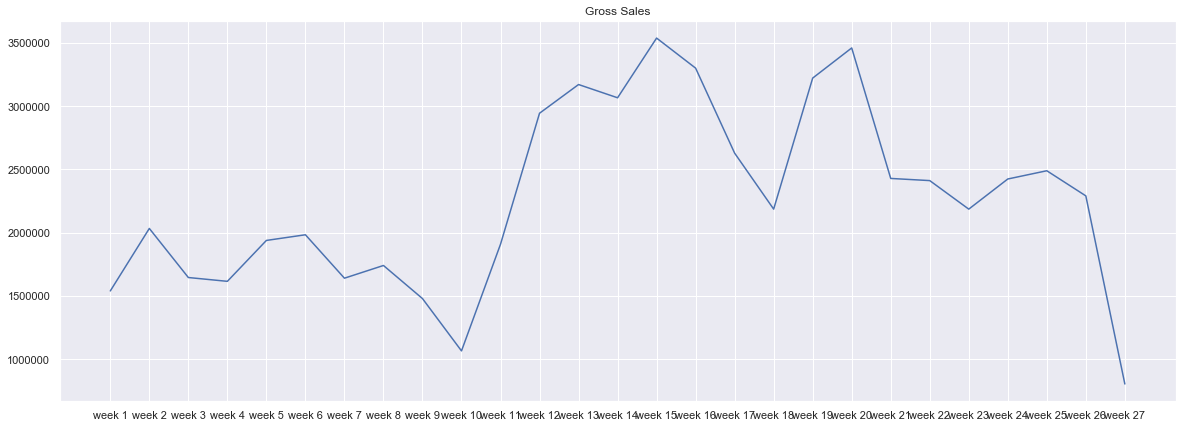

In [115]:
plt.subplots(figsize=(20,7))
plt.plot(df_w.set_index('Created_week'))
plt.title("Gross Sales")
df_w=(df_w.set_index('Created_week'))

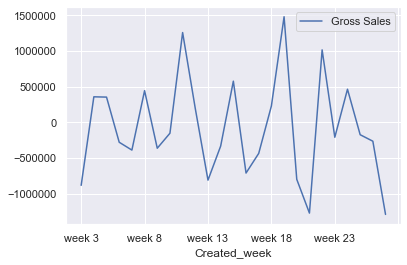

In [110]:
df_dif = df_w.set_index('Created_week').diff(periods=1)[1:].diff(periods=1)[1:]
df_dif.plot()
#normal EDA

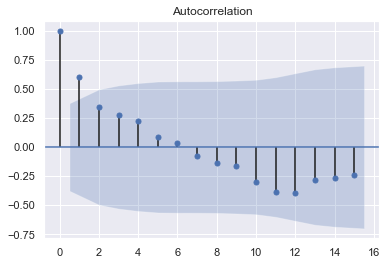

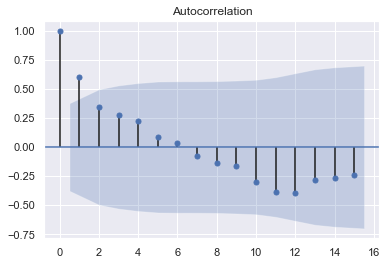

In [111]:
plot_acf(df_w.set_index('Created_week'))

In [114]:
print("There is a no negative dip, data might be stationery")

There is a no negative dip, data might be stationery


Text(0.5, 1.0, 'Rolling test statistics')

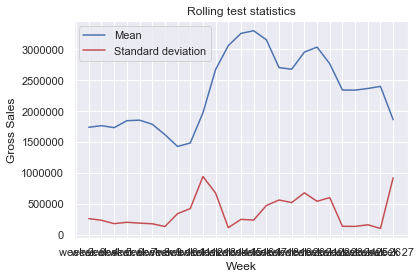

In [116]:
plt.plot(df_w.rolling(window=3).mean(),color='b',label='Mean')
plt.plot(df_w.rolling(window=3).std(),color='r',label='Standard deviation')
plt.legend(loc='best')
plt.xlabel("Week",color='k')
plt.ylabel("Gross Sales",color='k')
plt.title("Rolling test statistics")

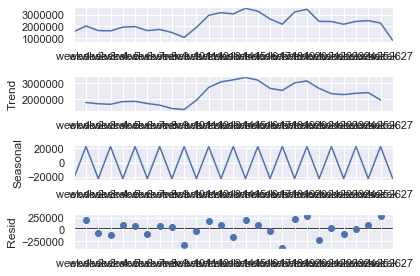

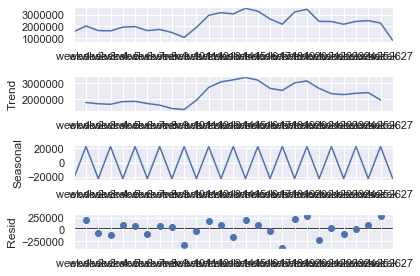

In [117]:
splot=seasonal_decompose(df_w,model='additive',freq=2)
splot.plot()

In [146]:
df_test = adfuller(df_w,autolag='AIC')
#agumentes dickyfuller test

In [147]:
print("P-value:",df_test[1])
print("The data is not stationary")
#if P is less than 0.05 it is sattionary

P-value: 0.3697939016782412
The data is not stationary


In [150]:
df_log1=np.log(df_w)
df_log1

,Gross Sales
Created_week,
week 1,14.246723
week 2,14.525043
week 3,14.313351
week 4,14.294866
week 5,14.477353
week 6,14.500189
week 7,14.310122
week 8,14.369578
week 9,14.206734


In [152]:
df_test2 = adfuller(df_log1,autolag='AIC')

In [153]:
print("P-value:",df_test2[1])
print("The data is not stationary")

P-value: 0.46739955067791894
The data is not stationary


In [157]:
df_log2=np.log(df_log1)

In [158]:
df_test3 = adfuller(df_log2,autolag='AIC')

In [159]:
print("P-value:",df_test3[1])
print("The data is not stationary")

P-value: 0.4693473245707364
The data is not stationary


In [32]:
df_veg

,Gross Sales
Created_week,
week 1,574018.06
week 10,348978.03
week 11,806243.92
week 12,1385986.15
week 13,1260510.74
week 14,1130127.51
week 15,1361716.96
week 16,1313841.70
week 17,983835.45


In [33]:
df_veg.shape

(27, 1)

In [34]:
p=i=q=range(0,5)
piq = itertools.product(p,i,q)
piq=list(piq)

In [35]:
for param in piq:
    try:
        model = ARIMA(df_veg,order=param)
        results_AR = model.fit(disp=-1)
        print(param,results_AR.aic)
    except:
        continue
#checking the combination in which is error is less
#arima=it is a linera line with combination of auto regression and moving avg., it is one of the best model

(0, 0, 0) 764.5212840710881
(0, 0, 1) 761.4173553248679
(0, 0, 2) 761.4990643041479
(0, 0, 3) 763.2583779492163
(0, 0, 4) 765.1774013200438
(0, 1, 0) 736.6528983713961
(0, 1, 1) 734.5718458412064
(0, 1, 2) 736.2003128550102
(0, 1, 3) 737.2281615506353
(0, 1, 4) 739.1600167587709
(0, 2, 0) 733.8633240488218
(0, 2, 1) 714.137215720439
(0, 2, 2) 711.7573017133814
(0, 2, 3) 714.6033195167379
(0, 2, 4) 716.8806377719491
(1, 0, 0) 759.3742912713392
(1, 0, 1) 761.1756371852609
(1, 0, 2) 763.1241956366403
(1, 0, 3) 765.0859098009387
(1, 0, 4) 767.0810045210765
(1, 1, 0) 735.4919956744932
(1, 1, 1) 735.3720435848464
(1, 2, 0) 723.8978314356577
(1, 2, 1) 712.8819520997585
(2, 0, 0) 761.1430846106646
(2, 0, 1) 762.9770955211122
(2, 0, 2) 766.3053256778735
(2, 0, 3) 766.7421626889425
(2, 0, 4) 768.2942267919072
(2, 1, 0) 737.0497883266554
(2, 1, 1) 737.2548353978209
(2, 1, 3) 741.0556360060051
(2, 2, 0) 720.8854975122946
(2, 2, 1) 714.3253578041354
(3, 0, 0) 763.1050649581887
(3, 0, 2) 766.2189557

In [43]:
model = ARIMA(df_veg,order=(0,2,2))
results_AR = model.fit()
print(param,results_AR.aic)

#using 1,1,0 bcz is has the less error

(4, 4, 4) 711.7573017133814


In [44]:
df_veg

,Gross Sales
Created_week,
week 1,574018.06
week 10,348978.03
week 11,806243.92
week 12,1385986.15
week 13,1260510.74
week 14,1130127.51
week 15,1361716.96
week 16,1313841.70
week 17,983835.45


In [45]:
results_AR.predict(start=len(df_veg),end=len(df_veg)+3)

25    25292.892689
26    11421.753966
27    -6548.483220
28    -6548.483220
dtype: float64

In [48]:
results_AR.forecast(steps=1)

(array([438632.64268948]),
 array([284030.44794943]),
 array([[-118056.80580419,  995322.09118314]]))

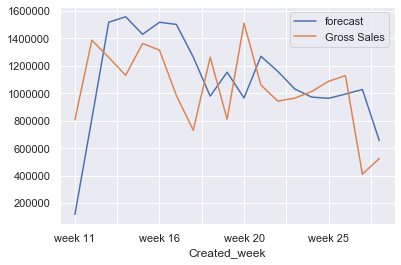

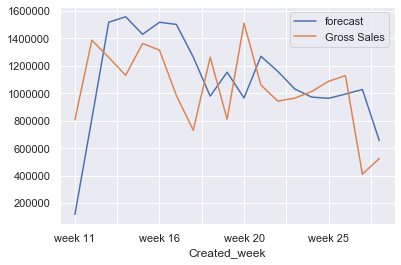

In [49]:
results_AR.plot_predict(2,20)